# Lab | Imbalanced data

We will be using the `files_for_lab/customer_churn.csv` dataset to build a churn predictor.

### Instructions

1. Load the dataset and explore the variables.
2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.
3. Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')
4. Build the logistic regression model.
5. Evaluate the model.
6. Even a simple model will give us more than 70% accuracy. Why?
7. **Synthetic Minority Oversampling TEchnique (SMOTE)** is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [1]:
import pandas as pd
import numpy as np

### 1. Load the dataset and explore the variables.

In [2]:
# (1) get the data
data=pd.read_csv('./files_for_lab/customer_churn.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [6]:
data['Churn']=data['Churn'].replace({'No': 0, 'Yes': 1})

Examining the numerical variables it is observed that:

SeniorCitizen is a binary column, we will assume that 1 means is senior citizen

Tenure and Monthly charges will be interepreted as continuous variables

In [7]:
selected_columns=['SeniorCitizen','tenure','MonthlyCharges']

### 3. Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')

In [8]:
# X-y split and train-test-split before transformations
# then train transformation on training set only

y=data['Churn']
X=data[selected_columns]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

In [48]:
y_test.shape

(2113,)

In [50]:
from sklearn.preprocessing import MinMaxScaler

# Scaling data
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)
X_test_normalized  = scaler.transform(X_test)

X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train.columns, index= X_train.index)
X_test_norm  = pd.DataFrame(X_test_normalized, columns=X_test.columns, index= X_test.index)

In [52]:
import pickle

path = "./"
filename = "MinMaxScaler.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(scaler, file)

In [56]:
X_test_norm.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,2113.000000,2113.000000,2113.000000
mean,0.153810,0.443222,0.456544
std,0.360852,0.338151,0.302537
min,0.000000,0.000000,-0.001496
25%,0.000000,0.125000,0.127681
50%,0.000000,0.388889,0.517706
75%,0.000000,0.750000,0.711222
max,1.000000,1.000000,1.000998


### 4. Build the logistic regression model.

In [57]:
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(max_iter=1000, random_state=0, solver='lbfgs',
                  multi_class='multinomial')

classification.fit(X_train_norm, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=0)

In [58]:
path = "./"
filename = "classification_logistic_regression.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(classification, file)

In [59]:
y_test_pred = classification.predict(X_test_norm)

In [60]:
y_test_pred

array([0, 1, 0, ..., 0, 1, 0])

### 5. Evaluate the model.

In [61]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_test_pred)) # or classification.score(X_test_concat_df, y_test)


0.7879791765262659


In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1543
           1       0.66      0.44      0.53       570

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.70      2113
weighted avg       0.77      0.79      0.77      2113



In [89]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_test_pred)

0.39938683938034236

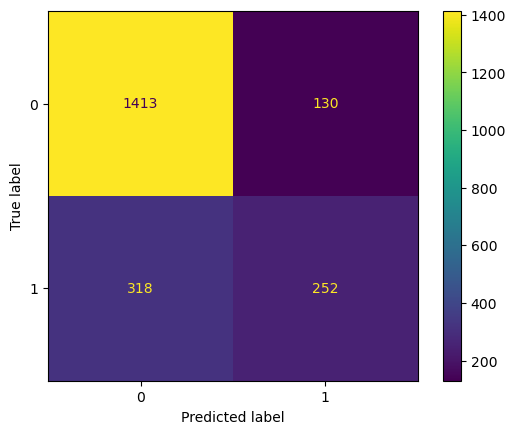

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_)
disp.plot()
plt.show()

### 6. Even a simple model will give us more than 70% accuracy. Why?

Because the accuracy score is based on total observations and therefore might overlook imbalances in the data.
In this case, the model has lower precision scores for 1s, as there are fewer 1s in the original data

### 7. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

After applying SMOTE there are improvements regarding the precision scores for the minority class  (1s).
However there were lowere scores for precision of the majority class (0s) as is expected when using an oversampling technique such as SMOTE.

In [197]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=100,k_neighbors=3)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train_norm, y_train)

In [198]:
# saving to directory:
path = "./"
filename = "smote_lab.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(sm, file)

In [199]:
from sklearn.linear_model import LogisticRegression

classification_s = LogisticRegression(max_iter=1000, random_state=0, solver='lbfgs',
                  multi_class='multinomial')

classification_s.fit(X_train_SMOTE, y_train_SMOTE)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=0)

In [200]:
y_test_pred_s = classification_s.predict(X_test_norm)

In [201]:
y_test_pred_s.shape

(2113,)

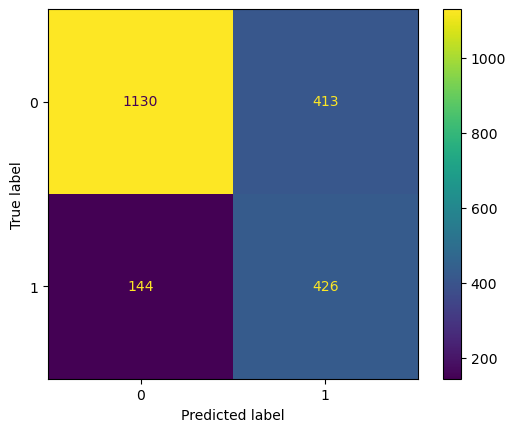

In [202]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_2 = confusion_matrix(y_test, y_test_pred_s)

disp = ConfusionMatrixDisplay(cm_2,display_labels=classification.classes_)
disp.plot()
plt.show()

In [203]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_s))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1543
           1       0.51      0.75      0.60       570

    accuracy                           0.74      2113
   macro avg       0.70      0.74      0.70      2113
weighted avg       0.78      0.74      0.75      2113



In [204]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_test_pred_s)

0.4175742061019707

3: 0.4175742061019707

